In [1]:
class Graphe:
    def ajouter_arete(self,v,w):   pass
    def ordre(self):               return 0
    def taille(self):              return 0
    def sommets_adjacents(self,v): return []

In [2]:
def exemple(Type):
    G = Type(9)
    G.ajouter_arete(0,1)
    G.ajouter_arete(0,2)
    G.ajouter_arete(1,2)
    G.ajouter_arete(2,3)
    G.ajouter_arete(3,4)
    G.ajouter_arete(2,5)
    G.ajouter_arete(7,8)
    G.ajouter_arete(7,6)
    G.ajouter_arete(6,8)
    return G

In [3]:
class Graphe_liste_aretes:    
    def __init__(self,V):
        self.V = V
        self.aretes = []
    def ajouter_arete(self,v,w):
        self.aretes.append((v,w))
    def ordre(self):
        return self.V
    def taille(self): 
        return len(self.aretes)
    def sommets_adjacents(self,v):
        adj = []
        for (w1,w2) in self.aretes:
            if v == w1:  adj.append(w2)
            elif v == w2: adj.append(w1)
        return adj

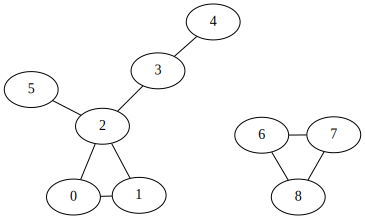

In [4]:
G1 = exemple(Graphe_liste_aretes)
import include.helpers as h; h.afficher_graphe(G1)

In [5]:
print(G1.aretes)

[(0, 1), (0, 2), (1, 2), (2, 3), (3, 4), (2, 5), (7, 8), (7, 6), (6, 8)]


In [6]:
import numpy as np
class Graphe_matrice_adjacence:
    def __init__(self,V):
        self.matrice = np.zeros((V,V),dtype=np.bool)
    def ajouter_arete(self,v,w):
        self.matrice[v,w] = self.matrice[w,v] = True
    def ordre(self):
        return self.matrice.shape[0]
    def taille(self):
        cnt = 0
        for i in nditer(self.matrice):
            cnt += 1
        return cnt // 2
    def sommets_adjacents(self,v):
        adj = []
        for w in range(0,self.ordre()):
            if self.matrice[v,w]:
                adj.append(w)
        return adj

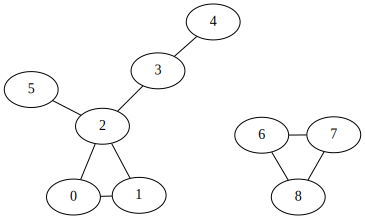

In [7]:
G2 = exemple(Graphe_matrice_adjacence)
h.afficher_graphe(G2)

In [9]:
print(G2.matrice)

[[False  True  True False False False False False False]
 [ True False  True False False False False False False]
 [ True  True False  True False  True False False False]
 [False False  True False  True False False False False]
 [False False False  True False False False False False]
 [False False  True False False False False False False]
 [False False False False False False False  True  True]
 [False False False False False False  True False  True]
 [False False False False False False  True  True False]]


In [10]:
class Graphe_listes_adjacence:
    def __init__(self,V):
        self.listes = []
        for i in range(V): self.listes.append([])
    def ajouter_arete(self,v,w):
        assert(v >= 0 and w >= 0 and 
               v < self.ordre() and 
               w < self.ordre())
        self.listes[v].append(w)
        self.listes[w].append(v)        
    def ordre(self):
        return len(self.listes)
    def taille(self):
        cnt = 0;
        for L in self.listes:
            cnt += len(L)
        return cnt // 2
    def sommets_adjacents(self,v):
        return self.listes[v]

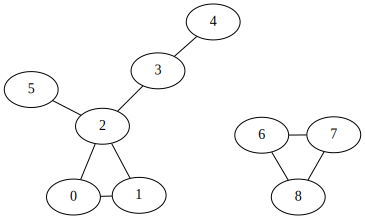

In [11]:
G3 = exemple(Graphe_listes_adjacence)
h.afficher_graphe(G3)

In [12]:
print(G3.listes)

[[1, 2], [0, 2], [0, 1, 3, 5], [2, 4], [3], [2], [7, 8], [8, 6], [7, 6]]
